<p> Importe de librerias </p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


<p> Importe de datos </p>

In [2]:
#import data .txt file and read it into a numpy array

def read_data(filename):
    data = np.loadtxt('../data/'+filename+'.txt', delimiter=' ')
    return data

#Data files belong to cold dark matter halo simulations of Milky Way particles interacting with the Large Magellanic Cloud (LMC)
#mw prefix is for MW particles in the non interacting regime
#lmc prefix is for MW particles in perturbed dark matter halo

data_mw = read_data('rand_mwb1_000')
data_lmc = read_data('rand_mwlmcb1_110')


#Potential energy of particles in dark matter halo
pot_mw = data_mw[:,6]
pot_mw_lmc = data_lmc[:,6]

#Extract velocity magnitude of particles in dark matter halo
v_mw = data_mw[:,3:6]
v_mw_lmc = data_lmc[:,3:6]


v_components=np.zeros((v_mw.shape[0],3))


def calculate_v_mag_square(v_mw):
    v_mag = np.sqrt(v_mw[:,0]**2+v_mw[:,1]**2+v_mw[:,2]**2)
    return v_mag

v_mag_square_mw = calculate_v_mag_square(v_mw)
v_mag_square_mw_lmc = calculate_v_mag_square(v_mw_lmc)



E_mw = pot_mw+v_mag_square_mw
E_mw_lmc = pot_mw_lmc+v_mag_square_mw_lmc


In [3]:
#Positions and velocities of Milky Way galaxy dark matter halo particles



pos_mw = data_mw[:,0:3]
pos_mw_lmc = data_lmc[:,0:3]


vel_mw = data_mw[:,3:6]
vel_mw_lmc = data_lmc[:,3:6]



#Calculate angular momentum components

def angular_momentum(pos, vel):
    """Calculate angular momentum components of particles given position an velocity arrays.

    Args:
        pos (_array_): _Position 3 dim_
        vel (_array_): _Velocities 3 dim_

    Returns:
        _1d array_: Angular momenta in each direction and total mag__
    """
    L = np.cross(pos, vel)
    mag = np.linalg.norm(L, axis=1)
    return L[:,0], L[:,1], L[:,2], mag

Lx1, Ly1, Lz1, L_mag_mw = angular_momentum(pos_mw, vel_mw)
Lx2, Ly2, Lz2, L_mag_mw_lmc = angular_momentum(pos_mw_lmc, vel_mw_lmc)

C:\Users\Stephanie\AppData\Local\Temp\ipykernel_9560\1922849876.py:17: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(energy[0].T), cmap='summer', vmin=0, vmax=2.5, origin='lower')


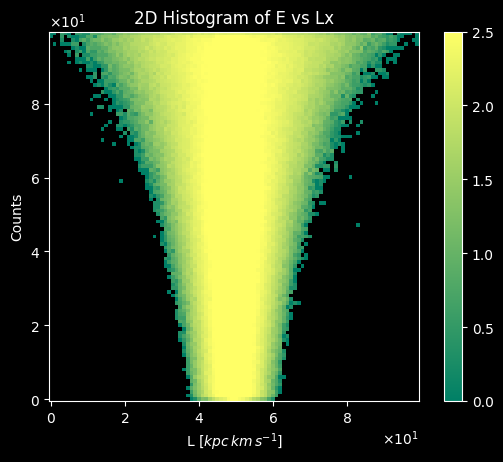

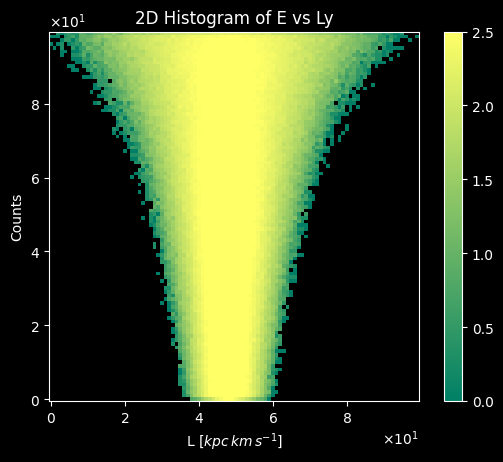

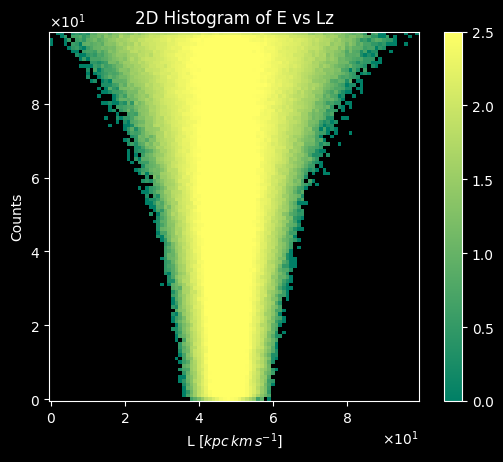

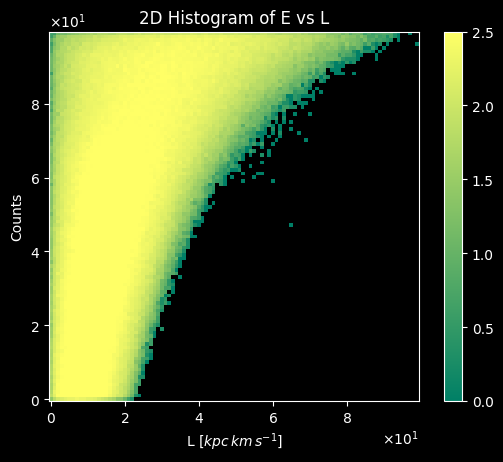

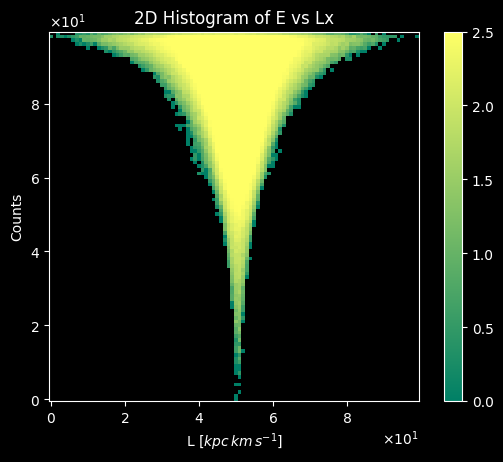

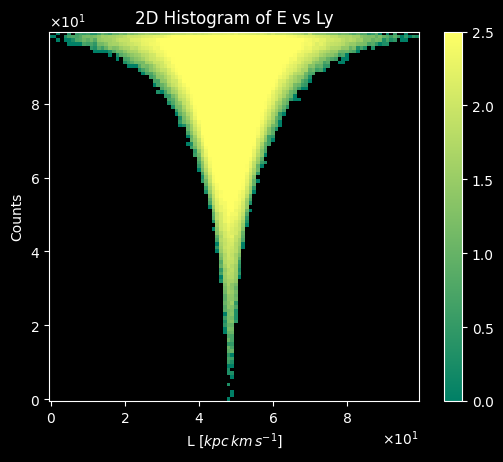

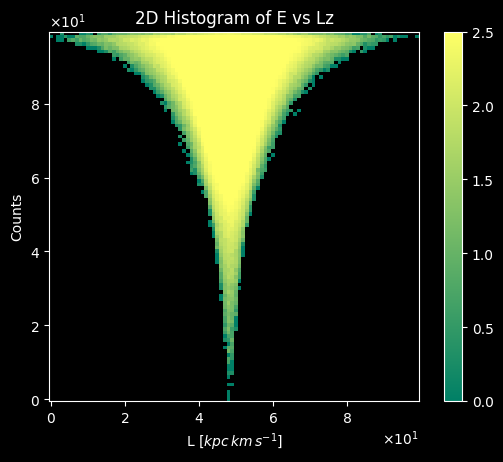

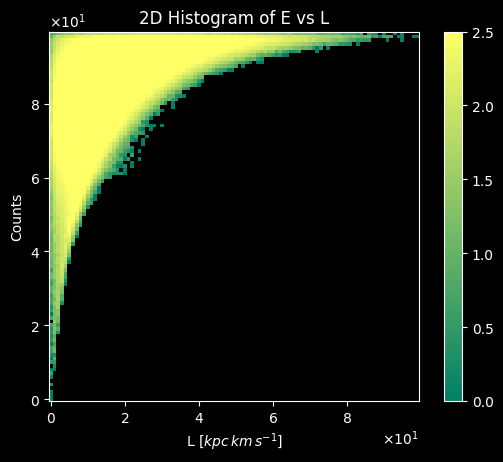

In [4]:


#Plots of Energy function of angular momentum for non perturbed halo


#Function to plot energy vs angular momentum 
def hist_energy_ang_momenta(L, E,  filename, xlabel, ylabel):
    """This function plots energy vs angular momentum for a given L and E array and makes histogram of density.

    Args:
        L (ndarray): 1d ang momenta numpy array
        E (ndarray): 1d energy numpy array
        filename (str): filename to save plot
        xlabel (str): Momentum axis label
        ylabel (str): Energy axis label
    """
    fig, ax = plt.subplots(1, 1)
    energy = np.histogram2d(L, E, bins=100)
    im = ax.imshow(np.log10(energy[0].T), cmap='summer', vmin=0, vmax=2.5, origin='lower')
    # ax.hist(L, bins=100, color='darkslateblue', alpha=0.5)
    ax.ticklabel_format( axis='both', style='sci', scilimits=(0,0), useMathText=True) 
    ax.set_xlabel(r'L [$kpc \, km \, s^{-1}$]')
    ax.set_ylabel(r'Counts')
    ax.title.set_text('2D Histogram of '+ ylabel + ' vs ' + xlabel)
    plt.colorbar(im, ax=ax)
    plt.savefig('./../media/imgs/hist/E_vs_L/'+filename+'.jpg')
    plt.show()
    plt.close()

hist_energy_ang_momenta(Lx1, E_mw, 'E_vs_Lx', 'Lx', 'E')
hist_energy_ang_momenta(Ly1, E_mw, 'E_vs_Ly', 'Ly', 'E')
hist_energy_ang_momenta(Lz1, E_mw, 'E_vs_Lz', 'Lz', 'E')
hist_energy_ang_momenta(L_mag_mw, E_mw, 'E_vs_L_mag', 'L', 'E')
hist_energy_ang_momenta(Lx2, E_mw_lmc, 'E_vs_Lx_lmc', 'Lx', 'E')
hist_energy_ang_momenta(Ly2, E_mw_lmc, 'E_vs_Ly_lmc', 'Ly', 'E')
hist_energy_ang_momenta(Lz2, E_mw_lmc, 'E_vs_Lz_lmc', 'Lz', 'E')
hist_energy_ang_momenta(L_mag_mw_lmc, E_mw_lmc, 'E_vs_L_mag_lmc', 'L', 'E')




Histograma restando la energia del halo no perturbado

C:\Users\Stephanie\AppData\Local\Temp\ipykernel_9560\1172537777.py:23: RuntimeWarning: divide by zero encountered in log10
  im = ax.imshow(np.log10(E.T), cmap='summer', origin='lower', vmin = 0, vmax = 2)
C:\Users\Stephanie\AppData\Local\Temp\ipykernel_9560\1172537777.py:23: RuntimeWarning: invalid value encountered in log10
  im = ax.imshow(np.log10(E.T), cmap='summer', origin='lower', vmin = 0, vmax = 2)


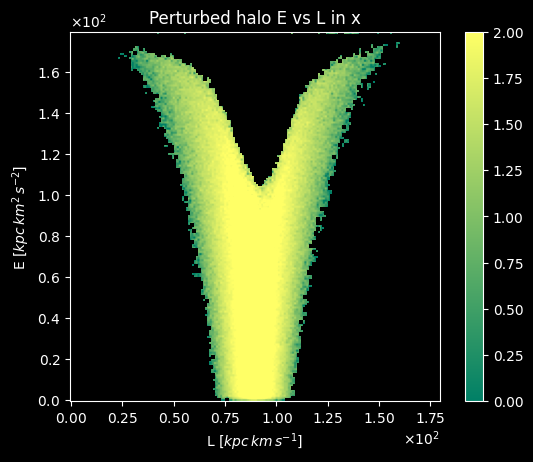

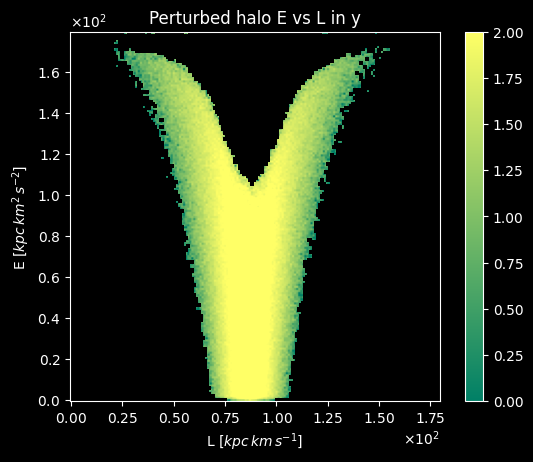

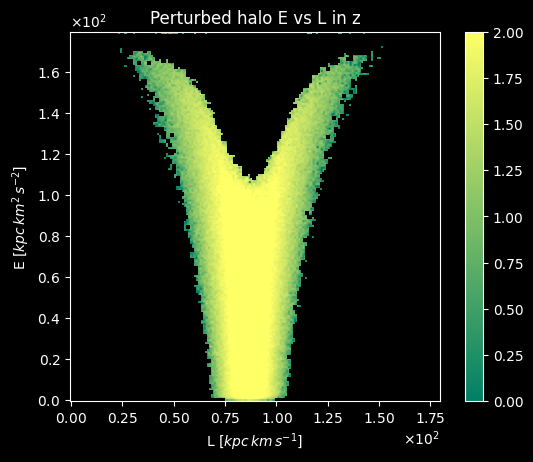

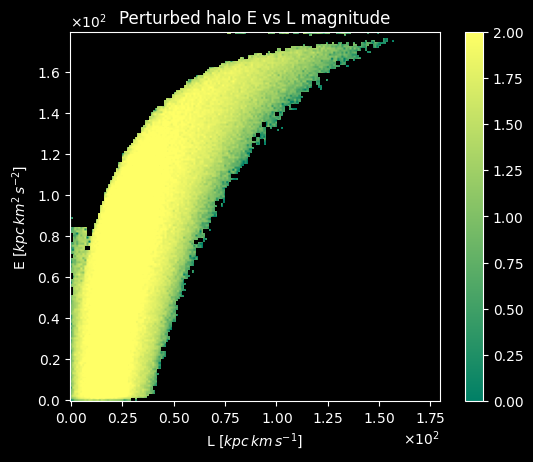

In [5]:
# energy_division = (E_mw_lmc/E_mw) - 1


energy_mw_lx = np.histogram2d(Lx1, E_mw, bins=180)
energy_mw_ly = np.histogram2d(Ly1, E_mw, bins=180)
energy_mw_lz = np.histogram2d(Lz1, E_mw, bins=180)
energy_mw_lmag = np.histogram2d(L_mag_mw, E_mw, bins=180)

energy_lmc_lx = np.histogram2d(Lx2, E_mw_lmc, bins=180)
energy_lmc_ly = np.histogram2d(Ly2, E_mw_lmc, bins=180)
energy_lmc_lz = np.histogram2d(Lz2, E_mw_lmc, bins=180)
energy_lmc_lmag = np.histogram2d(L_mag_mw_lmc, E_mw_lmc, bins=180)


energy_x = (energy_mw_lx[0] - energy_lmc_lx[0]) - 1
energy_y = (energy_mw_ly[0] - energy_lmc_ly[0]) - 1
energy_z = (energy_mw_lz[0] - energy_lmc_lz[0]) - 1
energy_mag = (energy_mw_lmag[0] - energy_lmc_lmag[0]) - 1


def hist_division_plt(E, filename, title):
    fig, ax = plt.subplots(1, 1)
    im = ax.imshow(np.log10(E.T), cmap='summer', origin='lower', vmin = 0, vmax = 2)
    ax.ticklabel_format( axis='both', style='sci', scilimits=(0,0), useMathText=True) 
    ax.set_xlabel(r'L [$kpc \, km \, s^{-1}$]')
    ax.title.set_text(title)
    ax.set_ylabel(r'E [$kpc \, km^2 \, s^{-2}$]')
    plt.colorbar(im, ax=ax)
    plt.savefig(filename)
    plt.show()
    plt.close()
    

hist_division_plt(energy_x, './../media/imgs/hist/E_Lx_div.jpg', 'Perturbed halo E vs L in x')
hist_division_plt(energy_y, './../media/imgs/hist/E_Ly_div.jpg', 'Perturbed halo E vs L in y')
hist_division_plt(energy_z, './../media/imgs/hist/E_Lz_div.jpg', 'Perturbed halo E vs L in z')
hist_division_plt(energy_mag, './../media/imgs/hist/E_Lmag_div.jpg', 'Perturbed halo E vs L magnitude')

<p> Usando el set de datos no perturbado separamos en 3 secciones, momento angular: bajo, medio, alto<p>

In [6]:
#For mw alone dataset

l

NameError: name 'l' is not defined